# MolPort diversity scores vs. ChEMBL similarity scores 

Pick 5,000 diverse fingerprints from 8M MolPort stock compounds which are also diverse from 260k ASINEX Platinum and Gold, then make a scatter plot of the diversity score (0.0 is most diverse) with each fingerprint's similarity to the nearest fingerprint in ChEMBL. Using 2048-bit RDKit Morgan fingerprints.

Picking 5,000 diverse compounds takes 12 minutes. The similarity search takes 1.5 minutes. Plotting is easy with the new pandas integration in chemfp 4.0!

In [1]:
import chemfp
chembl = chemfp.load_fingerprints("/Users/dalke/databases/chembl_28.fpb")
asinex = chemfp.load_fingerprints("/Users/dalke/databases/2021-02-Asinex-GoldPlatinum.fpb")
molport = chemfp.load_fingerprints("/Users/dalke/databases/molport/All Stock Compounds//all_stock_compounds.fpb")
(chembl, asinex, molport)

(FPBFingerprintArena(#fingerprints=2066376),
 FPBFingerprintArena(#fingerprints=261120),
 FPBFingerprintArena(#fingerprints=8074078))

In [2]:
picks = chemfp.maxmin(candidates = molport, library = asinex, num_picks = 5_000)
picks

picks:   0%|                                                                                                  …

MaxMinInfo('picked 5000 fps. similarity <= 1.0, #candidates=8074078, #library=261120 (pick: 0:12:18, total: 0:12:20)', picker=MaxMinPicker(#candidates=8069078, #picks=5000), result=PicksAndScores(#picks=5000))

In [3]:
diverse = molport.copy(indices=picks.result.get_indices())
chembl_search = chemfp.simsearch(queries = diverse, targets=chembl, k=1)
chembl_search

queries:   0%|          | 0/5000 [00:00<?, ? fps/s]

SimsearchInfo('1-nearest Tanimoto search. #queries=5000, #targets=2066376 (search: 0:01:33 total: 0:01:33)'", result=SearchResults(#queries=5000, #targets=2066376))

<AxesSubplot:xlabel='diversity', ylabel='ChEMBL similarity'>

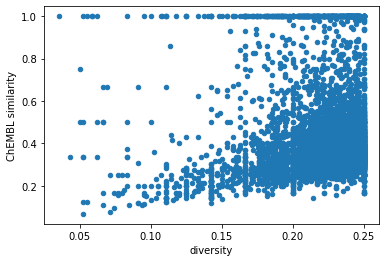

In [5]:
picks_df = picks.result.to_pandas(columns=["molport_id", "diversity"])
chembl_df = chembl_search.result.to_pandas(columns=["molport_id", "ChEMBL id", "ChEMBL similarity"])
picks_df.merge(chembl_df, on="molport_id").plot.scatter("diversity", "ChEMBL similarity")